## Nome: Felipe Tagawa Reis
## Mátricula: 2037

---

## Interpolação de Lagrange

### Função de interpolação de Lagrange

In [1]:
import numpy as np

def lagrange_base(xs, k, x):
    # xs: nós de interpolação (ex.: velocidades conhecidas da tabela)
    # k : índice do nó atual (para construir L_k)
    # x : ponto ou pontos onde vamos avaliar L_k(x)

    xs = np.asarray(xs, dtype=float)  # garante que xs é array NumPy
    x = np.asarray(x, dtype=float)    # garante que x também pode ser array
    xk = xs[k]                        # valor do nó correspondente ao índice k
    L = np.ones_like(x, dtype=float)  # inicializa L(x) = 1 (vai acumular o produto)

    # Produto: L_k(x) = ∏ (x - xj) / (xk - xj), para j ≠ k
    for j, xj in enumerate(xs):
        if j == k:
            continue                  # não usamos o termo quando j = k
        L *= (x - xj) / (xk - xj)     # multiplica cada fator do produto

    return L                          # retorna o valor de L_k(x)


# Utilizar essa função que calcula o polinômio interpolador de Lagrange P_n(x)
def lagrange_interp(xs, ys, x):
    # xs: nós de interpolação (ex.: velocidades conhecidas)
    # ys: valores da função nos nós (ex.: consumos conhecidos)
    # x : ponto(s) onde queremos calcular P_n(x)

    xs = np.asarray(xs, dtype=float)
    ys = np.asarray(ys, dtype=float)
    x = np.asarray(x, dtype=float)
    P = np.zeros_like(x, dtype=float)  # inicializa P(x) = 0

    # Soma: P_n(x) = Σ yk * L_k(x)
    for k in range(len(xs)):
        P += ys[k] * lagrange_base(xs, k, x)  # acumula cada termo da soma

    return P  # retorna o valor do polinômio em x

### Função para plotar os pontos e o polinômio interpolador

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_interpolacao(xs, ys, pontos_estimativa=None):
    """
    Plota o polinômio interpolador de Lagrange a partir dos dados fornecidos.

    Parâmetros:
    -----------
    xs : array-like
        Nós de interpolação (ex.: velocidades conhecidas).
    ys : array-like
        Valores da função nos nós (ex.: consumos correspondentes).
    pontos_estimativa : lista ou array, opcional
        Pontos onde se deseja destacar as estimativas no gráfico (ex.: [10, 11]).
    """

    # Cria um eixo denso para desenhar o polinômio
    xx = np.linspace(min(xs), max(xs), 600)
    Pn = lagrange_interp(xs, ys, xx)

    plt.figure(figsize=(8,5))

    # Plota os pontos originais da tabela
    plt.scatter(xs, ys, label='Dados (tabela)', color='blue')

    # Plota o polinômio interpolador
    plt.plot(xx, Pn, linestyle='--', label='Polinômio interpolador P_n(x)', color='orange')

    # Se pontos de estimativa forem passados, calcula e marca no gráfico
    if pontos_estimativa is not None:
        pontos_estimativa = np.array(pontos_estimativa)
        valores_estimados = lagrange_interp(xs, ys, pontos_estimativa)
        plt.scatter(pontos_estimativa, valores_estimados, marker='x', s=80, color='red', label='Estimativas')

    # Rótulos e título
    plt.xlabel('Velocidade (km/h)')
    plt.ylabel('Consumo (km/L)')
    plt.title('Interpolação de Lagrange — Consumo vs Velocidade')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

### Parte Prática

A tabela a seguir apresenta os resultados de testes de consumo de combustível em função da velocidade média de um veículo, obtidos em medições realizadas em diferentes tipos de percurso, incluindo trechos planos e regiões com maior inclinação.

| Velocidade (km/h) | Consumo (km/L) |
|--------------------|---------------|
| 30                 | 10,2          |
| 50                 | 14,5          |
| 70                 | 15,9          |
| 90                 | 16,8          |
| 112                | 19,1          |
| 130                | 22,5          |
| 150                | 20,0          |

Com base nesses dados, responda:

1. Faça uma estimativa de consumo considerando as velocidades médias de 50 km/h, 80 km/h e 140 km/h. (Arredondar os resultados para duas casa decimais)

In [6]:
# dados da tabela (velocidade e consumo)
xs = [30, 50, 70, 90, 112, 130, 150]
ys = [10.2, 14.5, 15.9, 16.8, 19.1, 22.5, 20.0]

# pontos a estimar
valores = [50, 80, 140]

for v in valores:
    print(f"Consumo estimado em {v} km/h: {lagrange_interp(xs, ys, v):.2f} km/L")

Consumo estimado em 50 km/h: 14.50 km/L
Consumo estimado em 80 km/h: 16.33 km/L
Consumo estimado em 140 km/h: 23.23 km/L


2. Plot um gráfico com os pontos conhecidos e o polinômio interpolador de Lagrange.

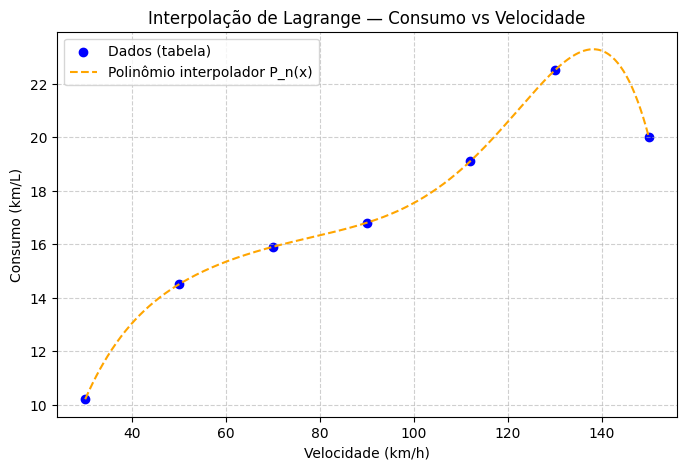

In [7]:
plot_interpolacao(xs, ys)

### Parte Teórica

1. Explique, **com suas palavras**, o que significa interpolar um conjunto de dados.

Resposta: Interpolar um conjunto de dados significa que temos um conjunto de pontos e desejamos estimar valores intermediários entre esses pontos, mediante uma função que passe **diretamente** pelos pontos.

2. Por que o polinômio de Lagrange sempre passa exatamente pelos pontos da tabela?

Resposta: Isso ocorre porque na construção do polinômio, todos os termos são 0, com exceção de k = i no somatório, fazendo com que P(xi) = yi, garantindo, assim, que o polinômio passe por todos os pontos.